# Video Game Sales
#### Sam Berkson PA3
Dataset source: https://www.kaggle.com/gregorut/videogamesales   
Note: a copy of this dataset is already included in `input_data/vgsales.csv`

### Data Loading and Prep
In terms of preparing our data for an EDA, there isnt much to do.  The data comes pretty well cleaned, with a few missing or N/A values sprinkled in. Theres just a few steps we need to take before we're ready to get rolling.
1. Load in vgsales.csv into a MyPyTable object, storing the data.  
2. Use MyPyTable's remove_rows_with_missing_values() method to eliminate rows with missing values.
    * Since the dataset is so large, we can comfortably trim data off without worrying about skewing data in a significant way.
3. Drop rows with N/A values


In [19]:
import matplotlib.pyplot as plt
from mypytable import MyPyTable
import plot_utils
import utils
import importlib
# reload utils files
importlib.reload(plot_utils)
importlib.reload(utils)

# make table and run initial cleaning
table = MyPyTable()
table.load_from_file('input_data/vgsales.csv')
table.remove_rows_with_missing_values()

drop_row_indexes = []

# Cleaning up null values
for row in table.data:
    for val in row:
        if val == "N/A":
            drop_row_indexes.append(row[0])
        elif val == "NA":
            drop_row_indexes.append(row[0])
        elif val == "na":
            drop_row_indexes.append(row[0])
        elif val == "n/a":
            drop_row_indexes.append(row[0])
        else:
            continue

table.drop_rows(drop_row_indexes)

### Exploratory Data Analysis

For our EDA, we will be using visualization tools to take a look at our data.  Before we can visualize our data, we need to fetch it from our table first and store it in workable lists.

In [20]:
game = table.get_column('Name')
platform = table.get_column('Platform')
year = table.get_column('Year')
genre = table.get_column('Genre')
NA_sales = table.get_column('NA_Sales')
EU_sales = table.get_column('EU_Sales')
JP_sales = table.get_column('JP_Sales')
other_sales = table.get_column('Other_Sales')
global_sales = table.get_column('Global_Sales')

Now that we've got our data ready to process, lets start visualizing.  Below are matplotlib histogram representation of the distribution of games by different categories.  First, we'll look at the distribution of games by platform.  
  

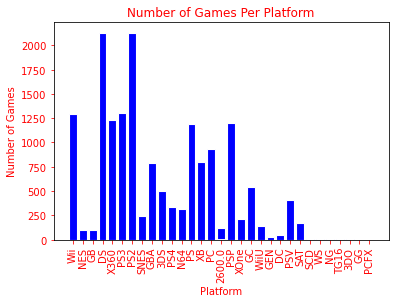

In [21]:
platform_list = []
platform_count = []
for val in platform:
    if val not in platform_list:
        platform_list.append(str(val))
        platform_count.append(0) 

for val in platform: 
    platform_count[platform_list.index(str(val))] += 1
    
plot_utils.bar_chart_helper(platform_list, platform_count, 'Number of Games Per Platform', 'Platform', 'Number of Games')

* We have $31$ different consoles, and $16,291$ different games.  
* Only $2$ consoles crest $2000$ games per platform, with Xbox 360 and PS2 roughly equal in entries.  
* We have $5$ consoles nestled around $1250$ entries, with more settling in around the $250-750$ range.
* We've got a few consoles below $250$ games, and a few consoles with only a few entries.

Due to the nature of the dataset, it would not be appropriate to label it as bimodal.  However, we can see that some consoles have significantly more entries than other consoles.

We will now take a look at the distribution of games by year.

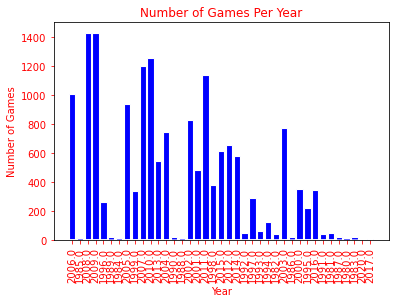

In [22]:
year_list = []
year_count = []
for val in year:
    if val not in year_list:
        year_list.append(str(val))
        year_count.append(0) 

for val in year: 
    year_count[year_list.index(str(val))] += 1

plot_utils.bar_chart_helper(year_list, year_count, 'Number of Games Per Year', 'Year', 'Number of Games')

* Our dataset spans from $1980$ to $2017$
* We still have $16291$ entries, with most centered around $2005 - 2012$
With this dataset, it is pretty safe to say that it is left-skewed.
* The peak number of games dramatically rises through the year $2000$, most likely corresponding with the technological advancements of the industry, as well as increased investment in the development of new IPs.
* Our peak number of games in a year is just over $1400$ games in the year $2009$.  $2009$ was headlined by games such as *Batman: Arkham Asylum*, *Call of Duty: Modern Warfare*, and *Left 4 Dead 2*.


Next, we will take a look at the distribution of games by genre.

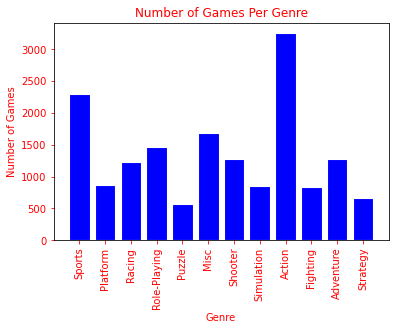

In [23]:
genre_list = []
genre_count = []
for val in genre:
    if val not in genre_list:
        genre_list.append(val)
        genre_count.append(0)

for val in genre: 
    genre_count[genre_list.index(val)] += 1

plot_utils.bar_chart_helper(genre_list, genre_count, 'Number of Games Per Genre', 'Genre', 'Number of Games')

* We maintain our $16291$ entries.
* We have $12$ different genres.
* Action is the most popular genre at over $3000$ entries.
    * Sports is the second most popular genre, surpassing $2250$ entries.
* The distribution is skewed towards lower numbers of games, particularly in the $1000-1500$ game range.


Now, we will take a look at each region's sales data for each game, and look at how the global distribution of sales falls.

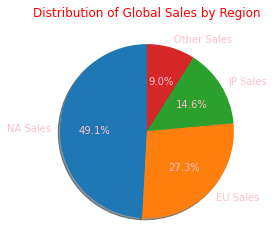

In [24]:
data = []
label = ["NA Sales", "EU Sales", "JP Sales", "Other Sales"]

# Calculate sales for all categories

total_sales = 0
for val in global_sales:
    total_sales += val

total_NA_sales = 0
for val in NA_sales:
    total_NA_sales += val

total_EU_sales = 0
for val in EU_sales:
    total_EU_sales += val

total_JP_sales = 0
for val in JP_sales:
    total_JP_sales += val

total_other_sales = 0
for val in other_sales:
    total_other_sales += val

# Calculate percentage of global sales for each category

percentage_NA_sales = total_NA_sales / total_sales
percentage_EU_sales = total_EU_sales / total_sales
percentage_JP_sales = total_JP_sales / total_sales
percentage_other_sales = total_other_sales / total_sales

# Load in percentages and graph on pie chart
data.append(percentage_NA_sales)
data.append(percentage_EU_sales)
data.append(percentage_JP_sales)
data.append(percentage_other_sales)

plot_utils.pie_chart_helper(data, label, "Distribution of Global Sales by Region")

* North America makes up nearly half of all global sales at $49.1$%.
    * The European Union comes in 2nd with over a quarter of all global sales at $27.3$%.
    * Japan only makes up $14.6$% of global sales, with other regions making up the final $9$%.
* The distribution of sales is skewed enormously towards North America, and even the European Union.